In [1]:
import numpy as np
import pandas as pd

from functools import reduce

import os

In [2]:
os.getcwd()

'/Users/gurdeep/Documents/tb2/DSMP/G32-Butterfly-Data/notebooks/analysis'

In [3]:
data_dir = "/Users/gurdeep/Documents/tb2/DSMP/data"

In [4]:
dfs = {}
for filepath in map(lambda s: data_dir+"/"+s, os.listdir(data_dir)):
    key = filepath.split("/")[-1].split(".")[0]
    try:
        dfs[key] = pd.read_csv(filepath)
    except pd.errors.ParserError as pxx:
        dfs[key] = pd.read_csv(filepath, delimiter=";")

for k, v in dfs.items():
    print(" ".join(k.split("_")).title(),":", v.shape)

/var/folders/cp/544pr8ln1f3cn9n_wy4r5nz80000gn/T/ipykernel_91527/582598224.py:5: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[key] = pd.read_csv(filepath)


Air Quality Continous Site Sensor Info : (15, 16)
Traffic Raw Count Cleaned : (9084, 33)
Bristol Places : (4652, 5)
Air Quality No2 Diffusion Data : (1244, 8)
Avg Annual Daily : (1010, 32)
Year Merged : (7, 55)
Count Points(City Of Bristol) : (258, 16)
Traffic Annual Cleaned : (28, 7)
Vehicles With A Sorn By Postcode District And Body Type : (91765, 6)
Avg Annual Daily Direc : (1868, 33)
Licensed Vehicles By Postcode District And Body Type : (92700, 6)
Licensed Plug-In Cars Lgvs And Quadricycles : (4, 34)
Air-Quality-Monitoring-Sites-Cleaned : (277, 16)
Bristol Air Quality Continous : (804232, 24)
Luftaden Data : (478669, 8)
Traffic Count Data Scoot : (8488337, 13)
Meteorological Data Bristol Lulsgate Airport : (210489, 17)
Licensed Vehicles By Body Type : (7, 12)


# Selected Datasets for time based merging (Rough List)

In [14]:
dfs.keys()

dict_keys(['air_quality_continous_site_sensor_info', 'traffic_raw_count_cleaned', 'bristol_places', 'air_quality_no2_diffusion_data', 'avg_annual_daily', 'year_merged', 'count_points(City of Bristol)', 'traffic_annual_cleaned', 'vehicles_with_a_sorn_by_postcode_district_and_body_type', 'avg_annual_daily_direc', 'licensed_vehicles_by_postcode_district_and_body_type', 'licensed_plug-in cars_lgvs_and_quadricycles', 'air-quality-monitoring-sites-cleaned', 'bristol_air_quality_continous', 'luftaden_data', 'traffic_count_data_scoot', 'meteorological_data_bristol_lulsgate_airport', 'licensed_vehicles_by_body_type'])

In [15]:
dfs['traffic_raw_count_cleaned'].info()
dfs['traffic_raw_count_cleaned'][['count_date', 'year']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9084 entries, 0 to 9083
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    9084 non-null   int64  
 1   count_point_id                9084 non-null   int64  
 2   direction_of_travel           9084 non-null   object 
 3   year                          9084 non-null   int64  
 4   count_date                    9084 non-null   object 
 5   hour                          9084 non-null   int64  
 6   region_id                     9084 non-null   int64  
 7   region_name                   9084 non-null   object 
 8   local_authority_id            9084 non-null   int64  
 9   local_authority_name          9084 non-null   object 
 10  road_name                     9084 non-null   object 
 11  road_type                     9084 non-null   object 
 12  start_junction_road_name      2880 non-null   object 
 13  end

,count_date,year
0,2014-05-02,2014
1,2014-05-02,2014
2,2014-05-02,2014
3,2014-05-02,2014
4,2014-05-02,2014
...,...,...
9079,2020-10-14,2020
9080,2020-10-14,2020
9081,2020-10-14,2020
9082,2020-10-14,2020


In [16]:
dfs['air_quality_no2_diffusion_data']

,Site ID,Location,Year,Concentration ugm-3,Count,Easting,Northing,geo_point_2d
0,577,High St lamp post outside Wards solicitors,2020,30.470961,6,358935,172981,"51.4543108936,-2.59239070501"
1,576,"Baldwin Street lamp post by cycle way, opp St ...",2020,23.947466,6,358792,172874,"51.4533384314,-2.59443611661"
2,575,Baldwin Street traffic light outside domino's,2020,30.898421,7,358685,172881,"51.4533935487,-2.59597673968"
3,574,"Whiteladies road, on loading sign next to Redl...",2020,27.257356,8,357678,174229,"51.4654388504,-2.61062992462"
4,571,Muller road junction with Downend road traffic...,2019,42.830000,5,359848,176411,"51.4852158694,-2.57964253646"
...,...,...,...,...,...,...,...,...
1239,2,Colston Avenue,2016,66.110000,11,358628,173011,"51.4545582107,-2.59681225748"
1240,2,Colston Avenue,2019,53.710000,11,358628,173011,"51.4545582107,-2.59681225748"
1241,2,Colston Avenue,2011,78.810000,12,358628,173011,"51.4545582107,-2.59681225748"
1242,2,Colston Avenue,2012,66.820000,12,358628,173011,"51.4545582107,-2.59681225748"


In [17]:
dfs['avg_annual_daily']

,Unnamed: 0,count_point_id,year,region_id,region_name,local_authority_id,local_authority_name,road_name,road_type,start_junction_road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,0,946809,2014,1,South West,144,"Bristol, City of",U,Minor,NaN,...,0,8,0,0,0,0,0,0,0,127
1,1,27877,2014,1,South West,144,"Bristol, City of",A4174,Major,A37,...,104,2687,424,141,88,8,34,112,806,18132
2,2,27728,2014,1,South West,144,"Bristol, City of",A4162,Major,A4,...,48,769,70,17,21,1,2,4,115,5417
3,3,46408,2014,1,South West,144,"Bristol, City of",A4044,Major,A38,...,687,1242,113,37,24,1,3,16,194,9099
4,4,946747,2014,1,South West,144,"Bristol, City of",B4052,Minor,NaN,...,34,2699,82,9,9,2,1,0,103,17828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,1005,28726,2020,1,South West,144,"Bristol, City of",A4,Major,A3029,...,247,2019,116,46,106,11,15,11,306,15121
1006,1006,38142,2020,1,South West,144,"Bristol, City of",A38,Major,Bedminster Down Rd,...,114,2940,233,36,60,10,39,39,417,15764
1007,1007,26128,2020,1,South West,144,"Bristol, City of",A3029,Major,A4,...,260,9469,606,231,411,121,174,229,1773,49199
1008,1008,28348,2020,1,South West,144,"Bristol, City of",A420,Major,Clarence Rd,...,294,1402,75,17,0,3,6,3,102,8083


In [18]:
dfs['vehicles_with_a_sorn_by_postcode_district_and_body_type']

,cars,motorcycles,others,postcode_district,year,quarter
0,23,12,7,AB1,2021,1
1,519,235,93,AB10,2021,1
2,550,212,187,AB11,2021,1
3,1175,467,720,AB12,2021,1
4,143,51,28,AB13,2021,1
...,...,...,...,...,...,...
91760,812,329,363,YO7,2014,4
91761,1346,875,474,YO8,2014,4
91762,318,160,208,ZE1,2014,4
91763,1173,468,666,ZE2,2014,4


In [19]:
dfs['avg_annual_daily_direc'].info() # try
dfs['avg_annual_daily_direc']['year'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    1868 non-null   int64  
 1   count_point_id                1868 non-null   int64  
 2   year                          1868 non-null   int64  
 3   region_id                     1868 non-null   int64  
 4   region_name                   1868 non-null   object 
 5   local_authority_id            1868 non-null   int64  
 6   local_authority_name          1868 non-null   object 
 7   road_name                     1868 non-null   object 
 8   road_type                     1868 non-null   object 
 9   start_junction_road_name      1279 non-null   object 
 10  end_junction_road_name        1279 non-null   object 
 11  easting                       1868 non-null   int64  
 12  northing                      1868 non-null   int64  
 13  lat

array([2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [20]:
dfs['bristol_air_quality_continous'].info()
dfs['air_quality_continous_site_sensor_info'] # site info for this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804232 entries, 0 to 804231
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   datetime           804232 non-null  object 
 1   nox                735831 non-null  float64
 2   no2                736086 non-null  float64
 3   no                 741533 non-null  float64
 4   site_id            804232 non-null  int64  
 5   pm10               166267 non-null  float64
 6   nvpm10             63476 non-null   float64
 7   vpm10              63476 non-null   float64
 8   nvpm25             60711 non-null   float64
 9   pm25               109817 non-null  float64
 10  vpm25              60711 non-null   float64
 11  co                 35186 non-null   float64
 12  o3                 112777 non-null  float64
 13  so2                21989 non-null   float64
 14  tempt              81652 non-null   float64
 15  relative_humidity  18869 non-null   float64
 16  lo

,site_id,nox,no2,no,pm10,nvpm10,vpm10,nvpm25,pm25,vpm25,co,o3,so2,tempt,relative_humidity,is_active
0,375,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
1,459,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
2,447,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
3,203,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True
4,463,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True
5,215,True,True,True,False,False,False,False,True,False,False,False,False,True,True,True
6,395,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
7,452,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True
8,270,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True
9,213,True,True,True,True,False,False,False,False,False,True,False,False,False,False,False


In [21]:
dfs['luftaden_data'].info()
dfs['luftaden_data'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478669 entries, 0 to 478668
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    478669 non-null  int64  
 1   date_time    478669 non-null  object 
 2   pm10         478669 non-null  float64
 3   pm25         478669 non-null  float64
 4   day_of_week  478669 non-null  int64  
 5   hour_of_day  478669 non-null  int64  
 6   latitude     478669 non-null  float64
 7   longitude    478669 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 29.2+ MB


,sensor_id,date_time,pm10,pm25,day_of_week,hour_of_day,latitude,longitude
0,17459,2019-01-01 01:00:00+00:00,4.122917,2.214167,2,1,51.464,-2.582420
1,7677,2019-01-01 01:00:00+00:00,20.613333,10.818750,2,1,51.474,-2.577000
2,17502,2019-01-01 01:00:00+00:00,16.660833,9.443333,2,1,51.468,-2.574000
3,19615,2019-01-01 01:00:00+00:00,13.294800,8.397200,2,1,51.464,-2.565000
4,17316,2019-01-01 01:00:00+00:00,68.435000,35.100000,2,1,51.462,-2.589295


In [22]:
dfs['traffic_count_data_scoot']['date_time'].agg(['min', 'max'])

min    2020-01-01 00:00:00+00:00
max    2022-02-14 00:00:00+00:00
Name: date_time, dtype: object

In [23]:
dfs['traffic_count_data_scoot'].info()
print(dfs['traffic_count_data_scoot']['date_time'].agg(['min', 'max']))
dfs['traffic_count_data_scoot'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8488337 entries, 0 to 8488336
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   count_device_id      int64  
 2   date_time            object 
 3   hourly_flow          int64  
 4   hourly_profile       int64  
 5   description          object 
 6   full_name            object 
 7   geo_point_2d         object 
 8   link                 object 
 9   link_direction_lane  object 
 10  junction             object 
 11  latitude             float64
 12  longitude            float64
dtypes: float64(2), int64(4), object(7)
memory usage: 841.9+ MB
min    2020-01-01 00:00:00+00:00
max    2022-02-14 00:00:00+00:00
Name: date_time, dtype: object


,Unnamed: 0,count_device_id,date_time,hourly_flow,hourly_profile,description,full_name,geo_point_2d,link,link_direction_lane,junction,latitude,longitude
0,0,100,2021-05-06 22:00:00+01:00,240,168,Bond St EB L2 @ Gloucester St,D02182 - Bond St EB L2 @ Gloucester St,"51.459311,-2.58684",Bond St,Bond St EB L2,Gloucester St,51.459311,-2.586840
1,1,256,2021-06-10 18:00:00+01:00,576,592,Parson St OB L1 @ Bedminster Rd,D05233 - Parson St OB L1 @ Bedminster Rd,"51.432602,-2.606828",Parson St,Parson St OB L1,Bedminster Rd,51.432602,-2.606828
2,2,204,2020-11-15 11:00:00+00:00,200,280,Bath Rd OB L1 @ Bath Bridge,D04181 - Bath Rd OB L1 @ Bath Bridge,"51.446628,-2.5804968",Bath Rd,Bath Rd OB L1,Bath Bridge,51.446628,-2.580497
3,3,278,2021-03-02 19:00:00+00:00,120,112,Parson St EB @ Hartcliffe Way,D05267 - Parson St EB @ Hartcliffe Way,"51.431153,-2.6050694",Parson St,Parson St EB,Hartcliffe Way,51.431153,-2.605069
4,4,2,2021-01-02 13:00:00+00:00,48,88,The Grove WB Ln1 @ Prince St,D01112 - The Grove WB Ln1 @ Prince St,"51.449528,-2.5965436",The Grove,The Grove WB Ln1,Prince St,51.449528,-2.596544


In [24]:
dfs['meteorological_data_bristol_lulsgate_airport']

,datetime,tempt,dewpoint_tempt,wind_speed,wind_dir,atm_pressure,visibility,wind_chill_tempt,relative_humidity,tempt_unit,dewpoint_tempt_unit,wind_speed_unit,wind_dir_unit,atm_pressure_unit,visibility_unit,wind_chill_tempt_unit,relative_humidity_unit
0,2022-02-14 23:50:00+00:00,3.0,2.0,5.000,250.0,1010.000,10.000,-1.000,93.00,celsius,celsius,m/s,degrees from north,mbar,km,celsius,percentage (%)
1,2022-02-14 23:20:00+00:00,3.0,2.0,5.000,260.0,1010.000,10.000,-1.000,93.00,celsius,celsius,m/s,degrees from north,mbar,km,celsius,percentage (%)
2,2022-02-14 22:50:00+00:00,4.0,2.0,7.000,270.0,1010.000,10.000,-1.000,87.00,celsius,celsius,m/s,degrees from north,mbar,km,celsius,percentage (%)
3,2022-02-14 22:20:00+00:00,4.0,2.0,6.000,270.0,1010.000,10.000,0.000,87.00,celsius,celsius,m/s,degrees from north,mbar,km,celsius,percentage (%)
4,2022-02-14 21:50:00+00:00,4.0,2.0,4.000,270.0,1010.000,10.000,1.000,87.00,celsius,celsius,m/s,degrees from north,mbar,km,celsius,percentage (%)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210484,2010-01-01 02:20:00+00:00,-2.0,-4.0,6.173,20.0,1002.032,9.656,-8.100,86.18,celsius,celsius,m/s,degrees from north,mbar,km,celsius,percentage (%)
210485,2010-01-01 01:50:00+00:00,-1.0,-4.0,5.144,20.0,1002.032,9.656,-6.272,80.07,celsius,celsius,m/s,degrees from north,mbar,km,celsius,percentage (%)
210486,2010-01-01 01:20:00+00:00,-2.0,-4.0,5.658,20.0,1002.032,9.656,-7.822,86.18,celsius,celsius,m/s,degrees from north,mbar,km,celsius,percentage (%)
210487,2010-01-01 00:50:00+00:00,-1.0,-4.0,5.658,20.0,1002.032,11.265,-6.561,80.07,celsius,celsius,m/s,degrees from north,mbar,km,celsius,percentage (%)


In [25]:
print(dfs['licensed_vehicles_by_body_type']['year'].unique())
dfs['licensed_vehicles_by_body_type']

[2020 2019 2018 2017 2016 2015 2014]


,Unnamed: 0,year,region,cars,motorcycles,light_goods_vehicles,heavy_goods_vehicles,buses_and_coaches,other_vehicles,total,diesel_cars,diesel_vans
0,0,2020,"Bristol, City",182186,8425,28723,1894,3112,2436,226776,57618,27412
1,1,2019,Bristol City,183188,8704,27988,2013,3300,2414,227607,60995,26809
2,2,2018,Bristol City,182282,8800,27273,2503,3267,2535,226660,61785,26244
3,3,2017,Bristol City,181503,8901,26888,5702,3491,2821,229306,61065,25846
4,4,2016,Bristol City,265359,8912,44403,6285,2767,3044,330770,119457,43290
5,5,2015,Bristol City,255691,8633,40874,6427,2769,2962,317356,112040,39750
6,6,2014,Bristol City,244431,8439,37378,5913,2661,2871,301693,103991,36219


# Dataset merged on year (2015-onwards)

In [26]:
def annual_it(df: pd.DataFrame, year_col: str, features: list, agg_func: str, prefix: str="", suffix: str=""):
    df = df.groupby(year_col)[features].agg(agg_func).reset_index()
    df.rename(columns={col: prefix+col+suffix for col in df.columns if col!=year_col}, inplace=True)
    return df

In [27]:
dfs['traffic_raw_count_cleaned'].columns

Index(['Unnamed: 0', 'count_point_id', 'direction_of_travel', 'year',
       'count_date', 'hour', 'region_id', 'region_name', 'local_authority_id',
       'local_authority_name', 'road_name', 'road_type',
       'start_junction_road_name', 'end_junction_road_name', 'easting',
       'northing', 'latitude', 'longitude', 'link_length_km',
       'link_length_miles', 'pedal_cycles', 'two_wheeled_motor_vehicles',
       'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle',
       'hgvs_3_rigid_axle', 'hgvs_4_or_more_rigid_axle',
       'hgvs_3_or_4_articulated_axle', 'hgvs_5_articulated_axle',
       'hgvs_6_articulated_axle', 'all_hgvs', 'all_motor_vehicles'],
      dtype='object')

In [28]:
dfs['traffic_raw_count_cleaned']['count_date'].agg(['min', 'max'])

min    2014-05-02
max    2020-10-14
Name: count_date, dtype: object

In [30]:
traffic_raw_features = ['pedal_cycles', 'two_wheeled_motor_vehicles',
       'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle',
       'hgvs_3_rigid_axle', 'hgvs_4_or_more_rigid_axle',
       'hgvs_3_or_4_articulated_axle', 'hgvs_5_articulated_axle',
       'hgvs_6_articulated_axle', 'all_hgvs', 'all_motor_vehicles']

# Avg of hourly flow of traffic / year
annual_it(dfs['traffic_raw_count_cleaned'], 'year', traffic_raw_features, 'mean', "1_", "_mean")

,year,1_pedal_cycles_mean,1_two_wheeled_motor_vehicles_mean,1_cars_and_taxis_mean,1_buses_and_coaches_mean,1_lgvs_mean,1_hgvs_2_rigid_axle_mean,1_hgvs_3_rigid_axle_mean,1_hgvs_4_or_more_rigid_axle_mean,1_hgvs_3_or_4_articulated_axle_mean,1_hgvs_5_articulated_axle_mean,1_hgvs_6_articulated_axle_mean,1_all_hgvs_mean,1_all_motor_vehicles_mean
0,2014,7.250868,7.974826,434.249132,8.538194,82.284722,11.623264,2.437500,2.979167,1.031250,3.472222,6.115451,27.658854,560.705729
1,2015,6.962862,5.706522,352.923007,6.870471,60.564312,7.809783,1.396739,1.509964,0.957428,1.942029,4.003623,17.619565,443.683877
2,2016,11.112007,5.584229,273.189068,7.345878,51.405018,4.904122,1.096774,1.175627,0.383513,1.013441,0.950717,9.524194,347.048387
3,2017,11.794818,9.904062,561.876050,10.351541,105.087535,12.231793,2.333333,3.068627,0.817927,2.957983,4.535714,25.945378,713.164566
4,2018,11.575540,4.967626,224.259592,7.423261,46.091727,5.495803,1.214628,1.685851,0.451439,1.257794,3.068945,13.174460,295.916667
5,2019,7.487533,5.322835,323.053806,5.309055,64.465223,7.862205,1.687664,2.281496,0.853018,3.508530,4.907480,21.100394,419.251312
6,2020,9.282967,6.755495,350.267399,5.139194,100.204212,12.592491,3.062271,4.048535,1.554945,4.239011,9.256410,34.753663,497.119963


In [31]:
dfs['air_quality_no2_diffusion_data']['Year'].agg(['min', 'max'])

min    2010
max    2020
Name: Year, dtype: int64

In [32]:
no2_diff_raw_features = ['no2_diff_conc']

temp_df = pd.DataFrame(dfs['air_quality_no2_diffusion_data'])
temp_df['year'] = temp_df['Year']
temp_df['no2_diff_conc'] = temp_df['Concentration ugm-3']

annual_it(temp_df, 'year', no2_diff_raw_features, 'mean', "2_", "_mean")

,year,2_no2_diff_conc_mean
0,2010,46.489371
1,2011,45.056475
2,2012,43.786961
3,2013,44.491650
4,2014,41.026698
5,2015,41.153084
6,2016,42.069074
7,2017,40.081132
8,2018,36.545984
9,2019,35.534216


In [126]:
dfs['avg_annual_daily'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    1010 non-null   int64  
 1   count_point_id                1010 non-null   int64  
 2   year                          1010 non-null   int64  
 3   region_id                     1010 non-null   int64  
 4   region_name                   1010 non-null   object 
 5   local_authority_id            1010 non-null   int64  
 6   local_authority_name          1010 non-null   object 
 7   road_name                     1010 non-null   object 
 8   road_type                     1010 non-null   object 
 9   start_junction_road_name      715 non-null    object 
 10  end_junction_road_name        715 non-null    object 
 11  easting                       1010 non-null   int64  
 12  northing                      1010 non-null   int64  
 13  lat

In [127]:
dfs['avg_annual_daily']['year'].agg(['min', 'max'])

min    2014
max    2020
Name: year, dtype: int64

<AxesSubplot:ylabel='Frequency'>

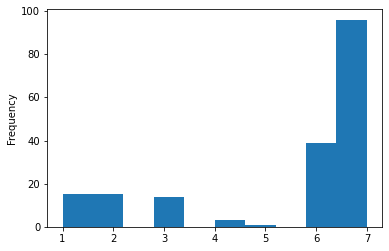

In [128]:
# Every sensor (count_point_id) has annual data in it, avg 5 years
dfs['avg_annual_daily'].groupby('count_point_id')['year'].count().plot(x='year', kind='hist')

In [129]:
avg_annual_raw_features = ['pedal_cycles', 'two_wheeled_motor_vehicles',
       'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle',
       'hgvs_3_rigid_axle', 'hgvs_4_or_more_rigid_axle',
       'hgvs_3_or_4_articulated_axle', 'hgvs_5_articulated_axle',
       'hgvs_6_articulated_axle', 'all_hgvs', 'all_motor_vehicles']

# Avg of annual flow of vehicles / year
annual_it(dfs['avg_annual_daily'], 'year', avg_annual_raw_features, 'mean', "3_", "_mean")

,year,3_pedal_cycles_mean,3_two_wheeled_motor_vehicles_mean,3_cars_and_taxis_mean,3_buses_and_coaches_mean,3_lgvs_mean,3_hgvs_2_rigid_axle_mean,3_hgvs_3_rigid_axle_mean,3_hgvs_4_or_more_rigid_axle_mean,3_hgvs_3_or_4_articulated_axle_mean,3_hgvs_5_articulated_axle_mean,3_hgvs_6_articulated_axle_mean,3_all_hgvs_mean,3_all_motor_vehicles_mean
0,2014,277.598540,273.788321,15567.591241,325.372263,2787.029197,329.218978,77.948905,78.343066,33.167883,138.306569,177.795620,834.766423,19788.474453
1,2015,274.189781,268.189781,15595.978102,325.678832,2893.649635,335.386861,79.678832,76.737226,40.839416,136.233577,189.912409,858.766423,19942.189781
2,2016,286.423358,266.299270,15890.364964,305.518248,3082.467153,339.372263,77.554745,87.167883,42.963504,133.802920,193.737226,874.554745,20419.277372
3,2017,301.079137,266.007194,15766.223022,291.122302,3030.021583,344.424460,76.942446,94.661871,35.381295,147.366906,198.230216,897.035971,20250.438849
4,2018,336.044586,236.949045,13933.573248,244.872611,2600.382166,299.063694,65.146497,81.777070,28.694268,100.254777,210.267516,785.101911,17800.796178
5,2019,366.636364,218.363636,12655.863636,224.431818,2362.562500,260.579545,59.835227,74.664773,29.090909,100.471591,192.914773,717.511364,16178.676136
6,2020,469.716535,199.944882,12149.984252,190.181102,2750.629921,300.354331,67.716535,86.322835,35.661417,110.007874,262.645669,862.598425,16153.338583


In [130]:
dfs['vehicles_with_a_sorn_by_postcode_district_and_body_type'].groupby(['year'])[['cars', 'motorcycles', 'others']].mean().reset_index()

,year,cars,motorcycles,others
0,2014,494.652158,229.968088,158.306799
1,2015,580.771895,257.637125,184.552861
2,2016,698.710813,287.654962,218.024048
3,2017,787.506004,319.023843,251.944396
4,2018,842.598435,344.072316,280.708996
5,2019,908.353120,366.347297,311.302103
6,2020,1019.579171,392.673934,365.926692
7,2021,766.571267,294.784853,269.730459


In [36]:
['postcode_district'].isin([f"BS{i}" for i in range(0, 21)])

0        False
1        False
2        False
3        False
4        False
         ...  
91760    False
91761    False
91762    False
91763    False
91764    False
Name: postcode_district, Length: 91765, dtype: bool

In [37]:
sorn_raw_features = ['cars', 'motorcycles', 'others']
temp_df = dfs['vehicles_with_a_sorn_by_postcode_district_and_body_type']
temp_df = temp_df[temp_df['postcode_district'].isin([f"BS{i}" for i in range(0, 21)])]
# Avg of sorn vehicle quarterly count of vehicles / year
annual_it(temp_df, 'year', sorn_raw_features, 'mean', "4_", "_mean")

,year,4_cars_mean,4_motorcycles_mean,4_others_mean
0,2014,532.3125,266.5750,153.3000
1,2015,615.3375,298.1250,172.2500
2,2016,743.7000,333.5625,222.6125
3,2017,827.3250,371.7250,254.4875
4,2018,888.1000,397.5750,274.4750
5,2019,947.1375,427.1750,291.8375
6,2020,1042.8875,460.6000,358.1000
7,2021,776.5375,350.1375,245.8625


In [15]:
dfs['air_quality_continous_site_sensor_info']

,site_id,nox,no2,no,pm10,nvpm10,vpm10,nvpm25,pm25,vpm25,co,o3,so2,tempt,relative_humidity,is_active
0,375,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
1,459,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
2,447,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
3,203,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True
4,463,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True
5,215,True,True,True,False,False,False,False,True,False,False,False,False,True,True,True
6,395,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
7,452,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True
8,270,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True
9,213,True,True,True,True,False,False,False,False,False,True,False,False,False,False,False


In [16]:
dfs['bristol_air_quality_continous'].info()
dfs['bristol_air_quality_continous']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804232 entries, 0 to 804231
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   datetime           804232 non-null  object 
 1   nox                735831 non-null  float64
 2   no2                736086 non-null  float64
 3   no                 741533 non-null  float64
 4   site_id            804232 non-null  int64  
 5   pm10               166267 non-null  float64
 6   nvpm10             63476 non-null   float64
 7   vpm10              63476 non-null   float64
 8   nvpm25             60711 non-null   float64
 9   pm25               109817 non-null  float64
 10  vpm25              60711 non-null   float64
 11  co                 35186 non-null   float64
 12  o3                 112777 non-null  float64
 13  so2                21989 non-null   float64
 14  tempt              81652 non-null   float64
 15  relative_humidity  18869 non-null   float64
 16  lo

,datetime,nox,no2,no,site_id,pm10,nvpm10,vpm10,nvpm25,pm25,...,tempt,relative_humidity,location,site_start_date,site_end_date,is_active,instrument_type,latitude,longitude,year
0,2010-01-01 00:00:00+00:00,44.0000,31.5000,7.7500,375,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Newfoundland Road Police Station,2005-01-01 00:00:00+00:00,2015-12-31 00:00:00+00:00,False,Continuous (Reference),51.460674,-2.582253,2010
1,2010-01-01 00:00:00+00:00,66.4400,40.5700,16.8600,459,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Cheltenham Road \ Station Road,2008-06-25 00:00:00+00:00,2011-12-31 00:00:00+00:00,False,Continuous (Reference),51.468939,-2.592724,2010
2,2010-01-01 00:00:00+00:00,45.2500,37.7500,7.5000,447,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Bath Road,2005-10-29 00:00:00+00:00,2013-01-04 00:00:00+00:00,False,Continuous (Reference),51.442537,-2.571375,2010
3,2010-01-01 00:00:00+00:00,36.5000,19.7500,4.0000,203,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Brislington Depot,2001-01-01 00:00:00+00:00,NaN,True,Continuous (Reference),51.441747,-2.559956,2010
4,2010-01-01 00:00:00+00:00,48.7500,32.2500,10.7500,463,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Fishponds Road,2009-03-13 00:00:00+00:00,NaN,True,Continuous (Reference),51.478045,-2.535230,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804227,2021-12-31 23:00:00+00:00,102.7500,43.5000,38.2500,501,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Colston Avenue,2018-11-30 00:00:00+00:00,NaN,True,Continuous (Reference),51.455269,-2.596649,2021
804228,2021-12-31 23:00:00+00:00,23.5000,10.5000,8.5000,270,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Wells Road,2003-05-23 00:00:00+00:00,NaN,True,Continuous (Reference),51.427864,-2.563742,2021
804229,2021-12-31 23:00:00+00:00,18.3600,10.3275,5.2387,500,20.290,NaN,NaN,NaN,NaN,...,11.5,NaN,Temple Way,2017-08-01 00:00:00+00:00,NaN,True,Continuous (Reference),51.457950,-2.583989,2021
804230,2021-12-31 23:00:00+00:00,20.7500,10.7500,6.5000,463,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Fishponds Road,2009-03-13 00:00:00+00:00,NaN,True,Continuous (Reference),51.478045,-2.535230,2021


In [9]:
pd.to_datetime(dfs['bristol_air_quality_continous']['datetime']).agg(['min', 'max', 'mean'])

min              2010-01-01 00:00:00+00:00
max              2021-12-31 23:00:00+00:00
mean   2015-06-20 07:41:32.101781504+00:00
Name: datetime, dtype: datetime64[ns, UTC]

In [13]:
pd.to_datetime(dfs['bristol_air_quality_continous']['datetime']).dt.time.describe()

count       804232
unique          24
top       01:00:00
freq         33511
Name: datetime, dtype: object

In [14]:
dfs['bristol_air_quality_continous'][dfs['bristol_air_quality_continous']['is_active'] == True]

,datetime,nox,no2,no,site_id,pm10,nvpm10,vpm10,nvpm25,pm25,...,tempt,relative_humidity,location,site_start_date,site_end_date,is_active,instrument_type,latitude,longitude,year
3,2010-01-01 00:00:00+00:00,36.5000,19.7500,4.0000,203,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Brislington Depot,2001-01-01 00:00:00+00:00,NaN,True,Continuous (Reference),51.441747,-2.559956,2010
4,2010-01-01 00:00:00+00:00,48.7500,32.2500,10.7500,463,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Fishponds Road,2009-03-13 00:00:00+00:00,NaN,True,Continuous (Reference),51.478045,-2.535230,2010
5,2010-01-01 00:00:00+00:00,34.2500,30.2500,2.5000,215,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Parson Street School,2002-02-01 00:00:00+00:00,NaN,True,Continuous (Reference),51.432676,-2.604957,2010
7,2010-01-01 00:00:00+00:00,34.0000,31.0000,3.0000,452,35.000,33.0,2.0,19.0,21.0,...,NaN,NaN,AURN St Pauls,2006-06-15 00:00:00+00:00,NaN,True,Continuous (Reference),51.462829,-2.584541,2010
8,2010-01-01 00:00:00+00:00,32.0000,26.0000,4.0000,270,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Wells Road,2003-05-23 00:00:00+00:00,NaN,True,Continuous (Reference),51.427864,-2.563742,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804227,2021-12-31 23:00:00+00:00,102.7500,43.5000,38.2500,501,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Colston Avenue,2018-11-30 00:00:00+00:00,NaN,True,Continuous (Reference),51.455269,-2.596649,2021
804228,2021-12-31 23:00:00+00:00,23.5000,10.5000,8.5000,270,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Wells Road,2003-05-23 00:00:00+00:00,NaN,True,Continuous (Reference),51.427864,-2.563742,2021
804229,2021-12-31 23:00:00+00:00,18.3600,10.3275,5.2387,500,20.290,NaN,NaN,NaN,NaN,...,11.5,NaN,Temple Way,2017-08-01 00:00:00+00:00,NaN,True,Continuous (Reference),51.457950,-2.583989,2021
804230,2021-12-31 23:00:00+00:00,20.7500,10.7500,6.5000,463,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Fishponds Road,2009-03-13 00:00:00+00:00,NaN,True,Continuous (Reference),51.478045,-2.535230,2021


In [31]:
air_pollutants_raw_features = ['nox', 'no2', 'no', 'vpm10', 'vpm25', 'co', 'o3', 'so2']

temp_df = pd.DataFrame(dfs['bristol_air_quality_continous'][dfs['bristol_air_quality_continous']['is_active'] == True].reset_index(drop=True))
temp_df['vpm25'].fillna(temp_df['pm25'], inplace=True)
temp_df['vpm10'].fillna(temp_df['pm10'], inplace=True)

# Avg of hourly pollutants / year
annual_it(temp_df, 'year', air_pollutants_raw_features, 'mean', "5_", "_mean").fillna(0)

,year,5_nox_mean,5_no2_mean,5_no_mean,5_vpm10_mean,5_vpm25_mean,5_co_mean,5_o3_mean,5_so2_mean
0,2010,94.540906,39.516829,34.182656,4.037340,3.276996,0.349510,39.611662,1.956456
1,2011,84.724786,38.673947,30.053780,5.813007,4.250494,0.285978,43.755674,1.691788
2,2012,92.901184,38.987440,35.126420,3.196274,3.317422,0.388930,40.608726,1.524804
3,2013,84.700350,38.017741,30.434848,3.451959,3.268623,0.000000,43.346600,0.000000
4,2014,80.706936,37.236936,28.362941,3.227802,3.408625,0.000000,44.090304,0.000000
5,2015,77.834705,36.342069,26.874141,3.045969,2.980039,0.000000,44.508744,0.000000
6,2016,87.079133,37.095834,32.603087,2.978796,3.289537,0.000000,38.836987,0.000000
7,2017,76.952563,34.814835,27.478863,4.966673,2.576377,0.000000,44.761449,0.000000
8,2018,74.723108,35.214590,25.761044,19.541392,12.037916,0.000000,50.792987,0.000000
9,2019,91.334482,36.665056,35.643056,19.682748,10.953558,0.000000,44.917251,0.000000


In [39]:
pd.to_datetime(dfs['meteorological_data_bristol_lulsgate_airport']['datetime']).agg(['min', 'max', 'mean'])

min              2010-01-01 00:20:00+00:00
max              2022-02-14 23:50:00+00:00
mean   2016-02-01 01:31:59.993444352+00:00
Name: datetime, dtype: datetime64[ns, UTC]

In [37]:
dfs['meteorological_data_bristol_lulsgate_airport'].info()
dfs['meteorological_data_bristol_lulsgate_airport']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210489 entries, 0 to 210488
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   datetime                210489 non-null  object 
 1   tempt                   210489 non-null  float64
 2   dewpoint_tempt          210489 non-null  float64
 3   wind_speed              210489 non-null  float64
 4   wind_dir                210489 non-null  float64
 5   atm_pressure            210489 non-null  float64
 6   visibility              210489 non-null  float64
 7   wind_chill_tempt        210489 non-null  float64
 8   relative_humidity       210489 non-null  float64
 9   tempt_unit              210489 non-null  object 
 10  dewpoint_tempt_unit     210489 non-null  object 
 11  wind_speed_unit         210489 non-null  object 
 12  wind_dir_unit           210489 non-null  object 
 13  atm_pressure_unit       210489 non-null  object 
 14  visibility_unit     

,datetime,tempt,dewpoint_tempt,wind_speed,wind_dir,atm_pressure,visibility,wind_chill_tempt,relative_humidity,tempt_unit,dewpoint_tempt_unit,wind_speed_unit,wind_dir_unit,atm_pressure_unit,visibility_unit,wind_chill_tempt_unit,relative_humidity_unit
0,2022-02-14 23:50:00+00:00,3.0,2.0,5.000,250.0,1010.000,10.000,-1.000,93.00,celsius,celsius,m/s,degrees from north,mbar,km,celsius,percentage (%)
1,2022-02-14 23:20:00+00:00,3.0,2.0,5.000,260.0,1010.000,10.000,-1.000,93.00,celsius,celsius,m/s,degrees from north,mbar,km,celsius,percentage (%)
2,2022-02-14 22:50:00+00:00,4.0,2.0,7.000,270.0,1010.000,10.000,-1.000,87.00,celsius,celsius,m/s,degrees from north,mbar,km,celsius,percentage (%)
3,2022-02-14 22:20:00+00:00,4.0,2.0,6.000,270.0,1010.000,10.000,0.000,87.00,celsius,celsius,m/s,degrees from north,mbar,km,celsius,percentage (%)
4,2022-02-14 21:50:00+00:00,4.0,2.0,4.000,270.0,1010.000,10.000,1.000,87.00,celsius,celsius,m/s,degrees from north,mbar,km,celsius,percentage (%)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210484,2010-01-01 02:20:00+00:00,-2.0,-4.0,6.173,20.0,1002.032,9.656,-8.100,86.18,celsius,celsius,m/s,degrees from north,mbar,km,celsius,percentage (%)
210485,2010-01-01 01:50:00+00:00,-1.0,-4.0,5.144,20.0,1002.032,9.656,-6.272,80.07,celsius,celsius,m/s,degrees from north,mbar,km,celsius,percentage (%)
210486,2010-01-01 01:20:00+00:00,-2.0,-4.0,5.658,20.0,1002.032,9.656,-7.822,86.18,celsius,celsius,m/s,degrees from north,mbar,km,celsius,percentage (%)
210487,2010-01-01 00:50:00+00:00,-1.0,-4.0,5.658,20.0,1002.032,11.265,-6.561,80.07,celsius,celsius,m/s,degrees from north,mbar,km,celsius,percentage (%)


In [40]:
dfs['meteorological_data_bristol_lulsgate_airport'].columns

Index(['datetime', 'tempt', 'dewpoint_tempt', 'wind_speed', 'wind_dir',
       'atm_pressure', 'visibility', 'wind_chill_tempt', 'relative_humidity',
       'tempt_unit', 'dewpoint_tempt_unit', 'wind_speed_unit', 'wind_dir_unit',
       'atm_pressure_unit', 'visibility_unit', 'wind_chill_tempt_unit',
       'relative_humidity_unit'],
      dtype='object')

In [44]:
weather_raw_features = ['dewpoint_tempt', 'wind_speed', 'wind_dir',
       'atm_pressure', 'visibility', 'wind_chill_tempt', 'relative_humidity']

temp_df = pd.DataFrame(dfs['meteorological_data_bristol_lulsgate_airport'])
temp_df['year'] = pd.to_datetime(temp_df['datetime']).dt.year

# Avg of 30 mins of weather data / year
annual_it(temp_df, 'year', weather_raw_features, 'mean', "6_", "_mean")

,year,6_dewpoint_tempt_mean,6_wind_speed_mean,6_wind_dir_mean,6_atm_pressure_mean,6_visibility_mean,6_wind_chill_tempt_mean,6_relative_humidity_mean
0,2010,5.950140,4.516709,174.762377,1013.814707,9.142013,7.006862,83.476865
1,2011,7.556483,4.999822,187.063460,1015.594531,8.632728,8.881676,83.767786
2,2012,7.119894,4.799056,194.193380,1014.450753,8.400261,7.562231,86.816253
3,2013,6.566197,4.938502,180.107770,1014.636470,8.602587,7.480103,83.675887
4,2014,7.939865,4.752059,185.047080,1011.776632,8.789232,9.157295,84.165388
5,2015,7.170237,5.144535,192.222414,1016.564152,8.853867,8.651502,82.641452
6,2016,7.375927,4.724064,188.449652,1015.422514,8.953324,8.445196,84.221693
7,2017,8.060080,4.788803,208.922330,1015.986514,8.840114,8.991153,86.117015
8,2018,8.011392,4.866568,180.164300,1014.330983,8.880500,8.828363,85.898428
9,2019,7.252160,4.666136,192.110113,1013.571712,9.129507,7.606256,82.533747


In [45]:
dfs['licensed_vehicles_by_body_type'].info()
dfs['licensed_vehicles_by_body_type']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            7 non-null      int64 
 1   year                  7 non-null      int64 
 2   region                7 non-null      object
 3   cars                  7 non-null      int64 
 4   motorcycles           7 non-null      int64 
 5   light_goods_vehicles  7 non-null      int64 
 6   heavy_goods_vehicles  7 non-null      int64 
 7   buses_and_coaches     7 non-null      int64 
 8   other_vehicles        7 non-null      int64 
 9   total                 7 non-null      int64 
 10  diesel_cars           7 non-null      int64 
 11  diesel_vans           7 non-null      int64 
dtypes: int64(11), object(1)
memory usage: 800.0+ bytes


,Unnamed: 0,year,region,cars,motorcycles,light_goods_vehicles,heavy_goods_vehicles,buses_and_coaches,other_vehicles,total,diesel_cars,diesel_vans
0,0,2020,"Bristol, City",182186,8425,28723,1894,3112,2436,226776,57618,27412
1,1,2019,Bristol City,183188,8704,27988,2013,3300,2414,227607,60995,26809
2,2,2018,Bristol City,182282,8800,27273,2503,3267,2535,226660,61785,26244
3,3,2017,Bristol City,181503,8901,26888,5702,3491,2821,229306,61065,25846
4,4,2016,Bristol City,265359,8912,44403,6285,2767,3044,330770,119457,43290
5,5,2015,Bristol City,255691,8633,40874,6427,2769,2962,317356,112040,39750
6,6,2014,Bristol City,244431,8439,37378,5913,2661,2871,301693,103991,36219


In [46]:
dfs['licensed_vehicles_by_body_type'].columns

Index(['Unnamed: 0', 'year', 'region', 'cars', 'motorcycles',
       'light_goods_vehicles', 'heavy_goods_vehicles', 'buses_and_coaches',
       'other_vehicles', 'total', 'diesel_cars', 'diesel_vans'],
      dtype='object')

In [47]:
licensed_vehicle_count_raw_features = ['cars', 'motorcycles',
       'light_goods_vehicles', 'heavy_goods_vehicles', 'buses_and_coaches',
       'other_vehicles', 'total', 'diesel_cars', 'diesel_vans']

# Avg of licensed vehicle count / year
annual_it(dfs['licensed_vehicles_by_body_type'], 'year', licensed_vehicle_count_raw_features, 'mean', "7_", "_mean")

,year,7_cars_mean,7_motorcycles_mean,7_light_goods_vehicles_mean,7_heavy_goods_vehicles_mean,7_buses_and_coaches_mean,7_other_vehicles_mean,7_total_mean,7_diesel_cars_mean,7_diesel_vans_mean
0,2014,244431.0,8439.0,37378.0,5913.0,2661.0,2871.0,301693.0,103991.0,36219.0
1,2015,255691.0,8633.0,40874.0,6427.0,2769.0,2962.0,317356.0,112040.0,39750.0
2,2016,265359.0,8912.0,44403.0,6285.0,2767.0,3044.0,330770.0,119457.0,43290.0
3,2017,181503.0,8901.0,26888.0,5702.0,3491.0,2821.0,229306.0,61065.0,25846.0
4,2018,182282.0,8800.0,27273.0,2503.0,3267.0,2535.0,226660.0,61785.0,26244.0
5,2019,183188.0,8704.0,27988.0,2013.0,3300.0,2414.0,227607.0,60995.0,26809.0
6,2020,182186.0,8425.0,28723.0,1894.0,3112.0,2436.0,226776.0,57618.0,27412.0


In [62]:
year_df_list = []

traffic_raw_features = ['pedal_cycles', 'two_wheeled_motor_vehicles',
       'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle',
       'hgvs_3_rigid_axle', 'hgvs_4_or_more_rigid_axle',
       'hgvs_3_or_4_articulated_axle', 'hgvs_5_articulated_axle',
       'hgvs_6_articulated_axle', 'all_hgvs', 'all_motor_vehicles']

no2_diff_raw_features = ['no2_diff_conc']

avg_annual_raw_features = ['pedal_cycles', 'two_wheeled_motor_vehicles',
       'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle',
       'hgvs_3_rigid_axle', 'hgvs_4_or_more_rigid_axle',
       'hgvs_3_or_4_articulated_axle', 'hgvs_5_articulated_axle',
       'hgvs_6_articulated_axle', 'all_hgvs', 'all_motor_vehicles']

sorn_raw_features = ['cars', 'motorcycles', 'others']

air_pollutants_raw_features = ['nox', 'no2', 'no', 'vpm10', 'vpm25', 'co', 'o3', 'so2']

weather_raw_features = ['dewpoint_tempt', 'wind_speed', 'wind_dir',
       'atm_pressure', 'visibility', 'wind_chill_tempt', 'relative_humidity']

licensed_vehicle_count_raw_features = ['cars', 'motorcycles',
       'light_goods_vehicles', 'heavy_goods_vehicles', 'buses_and_coaches',
       'other_vehicles', 'total', 'diesel_cars', 'diesel_vans']

print("Total Features:", len(traffic_raw_features+no2_diff_raw_features+avg_annual_raw_features+\
                             sorn_raw_features+air_pollutants_raw_features+\
                            weather_raw_features+licensed_vehicle_count_raw_features)+1)


# Avg of hourly flow of traffic / year
year_df_list.append(annual_it(dfs['traffic_raw_count_cleaned'], 'year', traffic_raw_features, 'mean', "1_", "_mean"))

temp_df = pd.DataFrame(dfs['air_quality_no2_diffusion_data'])
temp_df['year'] = temp_df['Year']
temp_df['no2_diff_conc'] = temp_df['Concentration ugm-3']

# Avg of no2_diff concentration / per year
year_df_list.append(annual_it(temp_df, 'year', no2_diff_raw_features, 'mean', "2_", "_mean"))

# Avg of annual flow of vehicles / year
year_df_list.append(annual_it(dfs['avg_annual_daily'], 'year', avg_annual_raw_features, 'mean', "3_", "_mean"))

# Avg of sorn vehicle quarterly count of vehicles / year
year_df_list.append(annual_it(dfs['vehicles_with_a_sorn_by_postcode_district_and_body_type'], 'year', sorn_raw_features, 'mean', "4_", "_mean"))

temp_df = pd.DataFrame(dfs['bristol_air_quality_continous'][dfs['bristol_air_quality_continous']['is_active'] == True].reset_index(drop=True))
temp_df['vpm25'].fillna(temp_df['pm25'], inplace=True)
temp_df['vpm10'].fillna(temp_df['pm10'], inplace=True)

# Avg of hourly pollutants / year
year_df_list.append(annual_it(temp_df, 'year', air_pollutants_raw_features, 'mean', "5_", "_mean").fillna(0))

temp_df = pd.DataFrame(dfs['meteorological_data_bristol_lulsgate_airport'])
temp_df['year'] = pd.to_datetime(temp_df['datetime']).dt.year

# Avg of 30 mins of weather data / year
year_df_list.append(annual_it(temp_df, 'year', weather_raw_features, 'mean', "6_", "_mean"))

# Avg of licensed vehicle count / year
year_df_list.append(annual_it(dfs['licensed_vehicles_by_body_type'], 'year', licensed_vehicle_count_raw_features, 'mean', "7_", "_mean"))

Total Features: 55


In [63]:
df = reduce(lambda df1,df2: pd.merge(df1, df2, on='year', how='inner'), year_df_list)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   year                                 7 non-null      int64  
 1   1_pedal_cycles_mean                  7 non-null      float64
 2   1_two_wheeled_motor_vehicles_mean    7 non-null      float64
 3   1_cars_and_taxis_mean                7 non-null      float64
 4   1_buses_and_coaches_mean             7 non-null      float64
 5   1_lgvs_mean                          7 non-null      float64
 6   1_hgvs_2_rigid_axle_mean             7 non-null      float64
 7   1_hgvs_3_rigid_axle_mean             7 non-null      float64
 8   1_hgvs_4_or_more_rigid_axle_mean     7 non-null      float64
 9   1_hgvs_3_or_4_articulated_axle_mean  7 non-null      float64
 10  1_hgvs_5_articulated_axle_mean       7 non-null      float64
 11  1_hgvs_6_articulated_axle_mean      

,year,1_pedal_cycles_mean,1_two_wheeled_motor_vehicles_mean,1_cars_and_taxis_mean,1_buses_and_coaches_mean,1_lgvs_mean,1_hgvs_2_rigid_axle_mean,1_hgvs_3_rigid_axle_mean,1_hgvs_4_or_more_rigid_axle_mean,1_hgvs_3_or_4_articulated_axle_mean,...,6_relative_humidity_mean,7_cars_mean,7_motorcycles_mean,7_light_goods_vehicles_mean,7_heavy_goods_vehicles_mean,7_buses_and_coaches_mean,7_other_vehicles_mean,7_total_mean,7_diesel_cars_mean,7_diesel_vans_mean
0,2014,7.250868,7.974826,434.249132,8.538194,82.284722,11.623264,2.437500,2.979167,1.031250,...,84.165388,244431.0,8439.0,37378.0,5913.0,2661.0,2871.0,301693.0,103991.0,36219.0
1,2015,6.962862,5.706522,352.923007,6.870471,60.564312,7.809783,1.396739,1.509964,0.957428,...,82.641452,255691.0,8633.0,40874.0,6427.0,2769.0,2962.0,317356.0,112040.0,39750.0
2,2016,11.112007,5.584229,273.189068,7.345878,51.405018,4.904122,1.096774,1.175627,0.383513,...,84.221693,265359.0,8912.0,44403.0,6285.0,2767.0,3044.0,330770.0,119457.0,43290.0
3,2017,11.794818,9.904062,561.876050,10.351541,105.087535,12.231793,2.333333,3.068627,0.817927,...,86.117015,181503.0,8901.0,26888.0,5702.0,3491.0,2821.0,229306.0,61065.0,25846.0
4,2018,11.575540,4.967626,224.259592,7.423261,46.091727,5.495803,1.214628,1.685851,0.451439,...,85.898428,182282.0,8800.0,27273.0,2503.0,3267.0,2535.0,226660.0,61785.0,26244.0
5,2019,7.487533,5.322835,323.053806,5.309055,64.465223,7.862205,1.687664,2.281496,0.853018,...,82.533747,183188.0,8704.0,27988.0,2013.0,3300.0,2414.0,227607.0,60995.0,26809.0
6,2020,9.282967,6.755495,350.267399,5.139194,100.204212,12.592491,3.062271,4.048535,1.554945,...,82.626243,182186.0,8425.0,28723.0,1894.0,3112.0,2436.0,226776.0,57618.0,27412.0


In [64]:
df.to_csv(data_dir+"/year_merged.csv", index=False)

In [40]:
dfs['vehicles_with_a_sorn_by_postcode_district_and_body_type']

,cars,motorcycles,others,postcode_district,year,quarter
0,23,12,7,AB1,2021,1
1,519,235,93,AB10,2021,1
2,550,212,187,AB11,2021,1
3,1175,467,720,AB12,2021,1
4,143,51,28,AB13,2021,1
...,...,...,...,...,...,...
91760,812,329,363,YO7,2014,4
91761,1346,875,474,YO8,2014,4
91762,318,160,208,ZE1,2014,4
91763,1173,468,666,ZE2,2014,4


In [39]:
sorn_raw_features = ['cars', 'motorcycles', 'others']
temp_df = dfs['vehicles_with_a_sorn_by_postcode_district_and_body_type']
temp_df = temp_df[temp_df['postcode_district'].isin([f"BS{i}" for i in range(0, 21)])]
# Avg of sorn vehicle quarterly count of vehicles / year
temp_df = annual_it(temp_df, 'year', sorn_raw_features, 'mean', "4_", "_mean")
temp_df['total_mean'] = (temp_df['4_cars_mean'] + temp_df['4_motorcycles_mean'] + temp_df['4_others_mean'])/3
temp_df

,year,4_cars_mean,4_motorcycles_mean,4_others_mean,total_mean
0,2014,532.3125,266.5750,153.3000,317.395833
1,2015,615.3375,298.1250,172.2500,361.904167
2,2016,743.7000,333.5625,222.6125,433.291667
3,2017,827.3250,371.7250,254.4875,484.512500
4,2018,888.1000,397.5750,274.4750,520.050000
5,2019,947.1375,427.1750,291.8375,555.383333
6,2020,1042.8875,460.6000,358.1000,620.529167
7,2021,776.5375,350.1375,245.8625,457.512500


# Quarterly Merging

In [6]:
dfs.keys()

dict_keys(['air_quality_continous_site_sensor_info', 'traffic_raw_count_cleaned', 'bristol_places', 'air_quality_no2_diffusion_data', 'avg_annual_daily', 'year_merged', 'count_points(City of Bristol)', 'traffic_annual_cleaned', 'vehicles_with_a_sorn_by_postcode_district_and_body_type', 'avg_annual_daily_direc', 'licensed_vehicles_by_postcode_district_and_body_type', 'licensed_plug-in cars_lgvs_and_quadricycles', 'air-quality-monitoring-sites-cleaned', 'bristol_air_quality_continous', 'luftaden_data', 'traffic_count_data_scoot', 'meteorological_data_bristol_lulsgate_airport', 'licensed_vehicles_by_body_type'])

In [84]:
temp_df = dfs['vehicles_with_a_sorn_by_postcode_district_and_body_type'].copy()
temp_df = temp_df[temp_df['postcode_district'].isin([f"BS{i}" for i in range(0, 21)])]
temp_df['sorn_vehicle_count'] = temp_df['cars'] + temp_df['motorcycles'] + temp_df['others']
temp_df['year_quarter'] = temp_df['year'].astype(str) + " Q" + temp_df['quarter'].astype(str)
# temp_df['date'] = pd.PeriodIndex(temp_df['year_quarter'], freq='Q').to_timestamp()
# temp_df = temp_df.sort_values(['year', 'quarter'])[['year_quarter', 'total_plug_in_vehicle_count']].drop_duplicates().reset_index(drop=True)
temp_df = temp_df[temp_df['year_quarter']!='2021 Q4'].groupby(['year_quarter'])['sorn_vehicle_count'].sum().reset_index()
sorn_df = temp_df.copy()
sorn_df

,year_quarter,sorn_vehicle_count
0,2014 Q1,19408
1,2014 Q2,18095
2,2014 Q3,18527
3,2014 Q4,20145
4,2015 Q1,20506
5,2015 Q2,20721
6,2015 Q3,21610
7,2015 Q4,24020
8,2016 Q1,25338
9,2016 Q2,24832


In [85]:
plug_df = dfs['licensed_plug-in cars_lgvs_and_quadricycles'].iloc[3].reset_index().iloc[3:].rename(columns={'index':'year_quarter', 3:'plugin_vehicle_count'})
plug_df

,year_quarter,plugin_vehicle_count
3,2021 Q3,2405
4,2021 Q2,2134
5,2021 Q1,1881
6,2020 Q4,1747
7,2020 Q3,1521
8,2020 Q2,1306
9,2020 Q1,1221
10,2019 Q4,1057
11,2019 Q3,925
12,2019 Q2,811


In [87]:
temp_df = sorn_df.merge(plug_df, on='year_quarter', how='left')
temp_df

,year_quarter,sorn_vehicle_count,plugin_vehicle_count
0,2014 Q1,19408,128
1,2014 Q2,18095,142
2,2014 Q3,18527,170
3,2014 Q4,20145,210
4,2015 Q1,20506,259
5,2015 Q2,20721,283
6,2015 Q3,21610,321
7,2015 Q4,24020,350
8,2016 Q1,25338,424
9,2016 Q2,24832,498


In [90]:
data_dir+"/quarterly_vehicle_count.csv"

'/Users/gurdeep/Documents/tb2/DSMP/data/quarterly_vehicle_count.csv'

In [89]:
temp_df.to_csv(data_dir+"/quarterly_vehicle_count.csv", index=False)